## 25.5 DepTree Module Test
- Author: Nana (Ching Wen Yang)
- Created at 2022/08/10
---
- 和 25.0 內容相似，拿各式各樣的評論檢測結果
- 評論來源： Google Maps Reviews，和以往的資料不同，沒有事先將句子斷開，以「評論」而非「句」為標註單位
- 評論內容下收

目前的評論資料集統整：（`ckip_absa_ch/data/`）
- 0628-beef-noodles 
    - 松園牛肉麵評論（真實評論）
    - 餐廳菜單：`repo/data/0628-beef-noodles/menu.csv`
    - 包含parser處理結果的檔案： `repo/data/0628-beef-noodles/review_clean_parsed.pkl`
       （以`pandas.read_pickle()`讀取）
    - 有事先經過斷句（以regex pattern`，|\,|。|！|\!|？|\?|\s|;`斷句，其中\s為空白格）
    - [處理用script](https://github.com/Nana2929/ckip_absa_ch/blob/main/codes/review_crawler.py)
- 0705-special-cases
    - 為處理conjunction與negation自己生成的評論集
    - 包含parser處理結果的檔案： `repo/data/0628-beef-noodles/review_clean_parsed.pkl`
     （以`pandas.read_pickle()`讀取）
- 0810-general-data
    - 四家餐廳真實評論合集
    - 勝利洋食、Solo Pasta、北大荒水餃店、小湯烏 湯專門店
    - 以ScrapeHero爬取，未經斷句，可檢視句長對 dependency parser 與ABSA系統的影響

## Setup
- `chyiin_chinese_parser` initialization
- module path configuration

In [3]:
import sys, os
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
'''path of source codes'''
root_path = '/share/home/nana2929/'
DepTree_path = '/share/home/nana2929/repo/src/'
for x in [root_path, DepTree_path]:
    if x not in sys.path:
        sys.path.append(x)

import chyiin_ch_parser
from chyiin_ch_parser import dependency_parser
from DepTree import DepTree
# ch_parser = dependency_parser.chinese_parser(port=2022, device_id=1) # the port that server_process runs on 

## Reading in test reviews (0810-general-data)
- Restaurants: 勝利洋食、Solo Pasta、北大荒水餃店、小湯烏 湯專門店
- 116 reviews (40 for each, dropna) 

## Parser Processing 

In [4]:
# infile = f'../data/0810-general-data/0810_review_cleaned.csv'
# df = pd.read_csv(infile)

In [5]:
# wses, poses, deptrees = [], [], []
# for rowid, row in df.iterrows():
#     test_review = row['reviewText']
#     ws, pos, deptree = ch_parser.output(test_review)  
#     wses.append(ws)
#     poses.append(pos)
#     deptrees.append(deptree)
#     # parser可能會不夠準
# assert len(wses) == len(poses) == len(deptrees) == len(df)

In [6]:
# df['word_seg'] = wses
# df['pos'] = poses
# df['dependency_parse'] = deptrees
outfile='../data/0810-general-data/0810_review_cleaned_parsed.pkl'
# df.to_pickle(outfile)
df = pd.read_pickle(outfile)

In [8]:
df.columns

Index(['author', 'reviewRating', 'reviewBody', 'dateCreated', 'reviewUrl',
       'reviewText', 'storeName', 'place_id', 'aggregateRating', 'ws', 'pos',
       'dependency_parse', 'word_seg'],
      dtype='object')

## Results 

In [68]:
import random 
rindex = random.randint(0, len(df)-1)

# examples: rindex = 53
# 56: unknown opinion無法抓到
# 1: 能夠抓到「我們，失望」
# 24: 抓出超多　aspects
print(f'Review index: {rindex}')
row = df.iloc[rindex]
print(row['reviewText'])
print(row['storeName'])
# print(row['pos'])
tree = DepTree(row, outdir = './25.5-test-dep')
pairs, spans = tree.predict()
for k, v in pairs.items():
    print(k, v)
print(spans)
print(tree.aspects) 
print(tree.opinions)

INFO:root:== DepTree ==


Review index: 57
東區小店位置不多，價格很親民 咖喱的味道很特別蠻好吃的 炸牡蠣和炸雞很好吃 三明治的肉很好但個人覺得肉汁沾到吐司軟掉，所以沒那麼推薦
勝利洋食


INFO:root:[lexicon-based] detected aspects: []
INFO:root:[lexicon-based] detected opinions: [{'id': 5, 'token': '多', 'polarity': 'neutral'}, {'id': 9, 'token': '親民', 'polarity': 'positive'}, {'id': 15, 'token': '特別', 'polarity': 'neutral'}, {'id': 17, 'token': '好吃', 'polarity': 'positive'}, {'id': 25, 'token': '好吃', 'polarity': 'positive'}, {'id': 31, 'token': '好', 'polarity': 'positive'}, {'id': 43, 'token': '推薦', 'polarity': 'positive'}]
INFO:root:[Rule 1] Detect NOUN neighbor in subtree; new aspect 位置 is added.
INFO:root:[Rule 1] Detect NOUN neighbor in subtree; new aspect 價格 is added.
INFO:root:[Rule 1] Detect NOUN neighbor in subtree; new aspect 味道 is added.
INFO:root:[Rule 1] Detect NOUN neighbor in subtree; new aspect 肉 is added.
INFO:root:[Rule 3] Detect negation on 推薦; polarity is reversed.
INFO:root:marking: [] for aspect; <> for opinion


位置 [('多', 'neutral'), ('好吃', 'positive'), ('好吃', 'positive'), ('沒推薦', 'negative')]
價格 [('親民', 'positive')]
味道 [('特別', 'neutral')]
肉 [('好', 'positive')]
東區小店[位置]不<多>，[價格]很<親民> 咖喱的[味道]很<特別>蠻<好吃>的 炸牡蠣和炸雞很<好吃> 三明治的[肉]很<好>但個人覺得肉汁沾到吐司軟掉，所以<沒>那麼<推薦>
[{'id': 3, 'token': '位置'}, {'id': 7, 'token': '價格'}, {'id': 13, 'token': '味道'}, {'id': 29, 'token': '肉'}]
[{'id': 5, 'token': '多', 'polarity': 'neutral'}, {'id': 9, 'token': '親民', 'polarity': 'positive'}, {'id': 15, 'token': '特別', 'polarity': 'neutral'}, {'id': 17, 'token': '好吃', 'polarity': 'positive'}, {'id': 25, 'token': '好吃', 'polarity': 'positive'}, {'id': 31, 'token': '好', 'polarity': 'positive'}, {'id': 43, 'token': '推薦', 'polarity': 'positive'}]


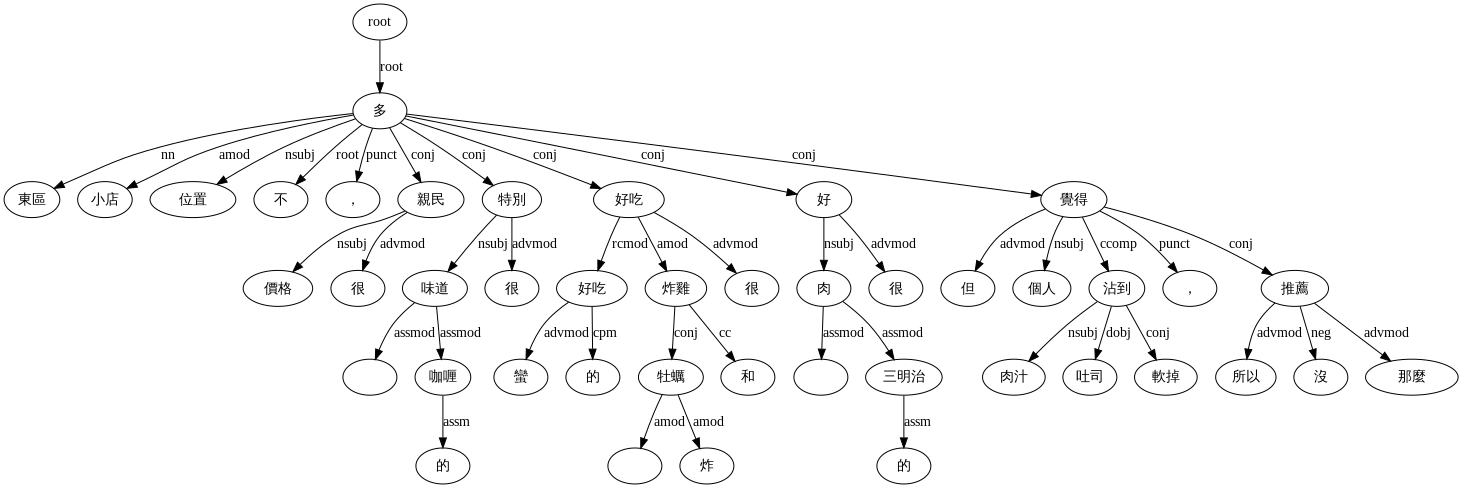

In [69]:
tree.to_image()

In [32]:
import re
string = "  whitespace"
string.rsplit(' ', 1)

[' ', 'whitespace']

## Logging
- For logging via multiple modules, refer to 
https://docs.python.org/3/howto/logging.html. 
- In brief, the logging config should be set up at the TOP level, where you 'execute': 

    * main.py 
    ```
        def main():
            from lib import DepTree
            import logging
            # set up logging config here 
            # filemode='w' sets the mode to `overwrite`
            # instead of `append` 
            logging.basicConfig(filename='example.log', filemode='w', level=logging.INFO)
            # call DepTree here
    ```
   
    * lib.py 
    ```
        class DepTree:
            import logging
            logging.info('....')
     ```  
    
    Then you can run `main.py`, and expect all logging outputs be directed to 'example.log'

- For some unknown reasons, it is impossible to replace that `main.py` to a jupyter-setting, 
   i.e. setting logging config and run DepTree module in a jupyter notebook does not yield the expected result 
   (logging does not go to the file). 

In [ ]:
### My SetUp
logging.basicConfig(filename='./my-absa-log.log',
                    filemode='w',
                    level=logging.INFO,
                    format='%(asctime)s.[%(levelname)s] %(message)s',
                    datefmt='%H:%M:%S')

In [21]:
import random 
rindex = random.randint(0, len(df)-1)
# examples: rindex = 53
# 56: unknown opinion無法抓到
# 1: 能夠抓到「我們，失望」
# 24: 抓出超多　aspects
# 11: 正確答案有很多對
import logging
logging.basicConfig(filename='./myapp.log', 
                    level=logging.INFO,
                    format='%(levelname)s %(message)s')
                    # handlers=[logging.FileHandler('./tmp.log'),
                    #           logging.StreamHandler()])

logging.info('start')


print(f'Review index: {rindex}')
row = df.iloc[rindex]
print(row['reviewText'])
print(row['storeName'])
# print(row['pos'])
tree = DepTree(row, outdir = './25.5-test-dep')
pairs, spans = tree.predict()
for k, v in pairs.items():
    print(k, v)
print(spans)
print(tree.aspects) 
print(tree.opinions)



logging.info('fin')
# https://stackoverflow.com/questions/6386698/how-to-write-to-a-file-using-the-logging-python-module
# https://stackoverflow.com/questions/14058453/making-python-loggers-output-all-messages-to-stdout-in-addition-to-log-file

Review index: 26
不錯吃
Solo Pasta
不錯吃
[]
[{'id': 1, 'token': '不錯', 'polarity': 'neutral'}]


## Testing Logging writeout 

In [2]:
# import logging
# logging.basicConfig(filename='example.log', level=logging.DEBUG)
# logging.debug('This message should go to the log file')
# logging.info('So should this')
# logging.warning('And this, too')
# logging.error('And non-ASCII stuff, too, like Øresund and Malmö')